# Lesson 7 - Parkinson PCR

## Author - Tariq Ayub

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [1]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [3]:
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [5]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# One-hot encode inputs
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))

# Get target and original x-matrix
y = parkinsons_df[target_label]
X = parkinsons_df.as_matrix(columns=feature_labels)

DataFrame one-hot-expanded shape: (5875, 17)


C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [51]:
X

array([[6.6200e-03, 3.3800e-05, 4.0100e-03, ..., 4.1888e-01, 5.4842e-01,
        1.6006e-01],
       [3.0000e-03, 1.6800e-05, 1.3200e-03, ..., 4.3493e-01, 5.6477e-01,
        1.0810e-01],
       [4.8100e-03, 2.4620e-05, 2.0500e-03, ..., 4.6222e-01, 5.4405e-01,
        2.1014e-01],
       ...,
       [3.4900e-03, 2.4700e-05, 1.5200e-03, ..., 4.7792e-01, 5.7888e-01,
        1.4157e-01],
       [2.8100e-03, 2.0340e-05, 1.2800e-03, ..., 5.6865e-01, 5.6327e-01,
        1.4204e-01],
       [2.8200e-03, 2.1100e-05, 1.3500e-03, ..., 5.8608e-01, 5.7077e-01,
        1.5336e-01]])

In [36]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [37]:
# Scale all columns first

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).

# Create a scaled y-target.

In [52]:
x_scaled=np.apply_along_axis(scale,0, X)

In [53]:
x_scaled

array([[ 0.08290524, -0.28424219,  0.32745251, ..., -1.21406557,
        -1.47849968, -0.65065821],
       [-0.56079341, -0.75672302, -0.53374622, ..., -1.05511879,
        -1.24788006, -1.21858474],
       [-0.23894409, -0.53938184, -0.30003802, ..., -0.78485974,
        -1.5401393 , -0.10328021],
       ...,
       [-0.47366293, -0.5371584 , -0.46971658, ..., -0.62937908,
        -1.04885603, -0.85275524],
       [-0.5945787 , -0.65833584, -0.54655215, ...,  0.26914065,
        -1.26903782, -0.8476181 ],
       [-0.59280052, -0.63721316, -0.52414178, ...,  0.44175389,
        -1.163249  , -0.72388969]])

In [32]:
y_scaled = np.apply_along_axis(scale, 0, y)

array([0.50274516, 0.54910301, 0.59536741, ..., 0.32488426, 0.27927411,
       0.23310318])

In [54]:
# PCR!!
pca = PCA()
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

In [55]:
print(pca_df.head())
print(pca_df.shape)

        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -0.978108 -0.057540  1.760088 -0.049483 -0.476558  0.376887 -0.561067   
1 -2.601857  0.553154  1.487455  0.058596  0.066572  0.170468  0.215560   
2 -1.939773 -0.115513  1.205962 -0.687477 -0.856751 -0.136187 -0.139529   
3 -1.022993 -0.103017  0.533406 -0.508542 -1.541859 -0.189726  0.583599   
4 -2.475704  0.230181  0.960314 -0.476941 -0.604783 -0.080478  0.417343   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.635614  0.339977  0.039112 -0.027261 -0.024319  0.001029  0.031725   
1 -0.165989  0.122985 -0.018919 -0.003925  0.052872 -0.011968  0.024268   
2  0.228277  0.088253  0.041748 -0.079120 -0.015546 -0.059301 -0.002890   
3 -0.088389 -0.618057  0.102112 -0.265533 -0.024285  0.001197 -0.182390   
4 -0.175978  0.016228  0.004227 -0.036416  0.009636 -0.068263  0.004084   

       pc15      pc16  total_UPDRS  
0  0.000752  0.000007     0.502745  
1 -0.000761 -0.000007   

In [92]:
pca_result

array([[-9.78108130e-01, -5.75399218e-02,  1.76008777e+00, ...,
         3.17245836e-02,  7.52459818e-04,  7.07996305e-06],
       [-2.60185724e+00,  5.53153883e-01,  1.48745541e+00, ...,
         2.42684195e-02, -7.60691491e-04, -7.35705465e-06],
       [-1.93977308e+00, -1.15512891e-01,  1.20596191e+00, ...,
        -2.88950739e-03,  7.42775345e-04,  3.68466447e-06],
       ...,
       [-1.76848047e+00,  6.39184578e-01,  1.01348051e+00, ...,
        -4.46667840e-02, -6.32227266e-06,  1.76764696e-04],
       [-2.45726404e+00,  1.33233073e-01,  6.48357664e-01, ...,
         1.23368565e-02, -7.40959072e-04,  1.66622763e-04],
       [-2.02836092e+00,  3.16369357e-01,  4.10727049e-01, ...,
         5.44877801e-03,  7.70820728e-04, -1.83184969e-04]])

Text(0, 0.5, 'Explained Variance')

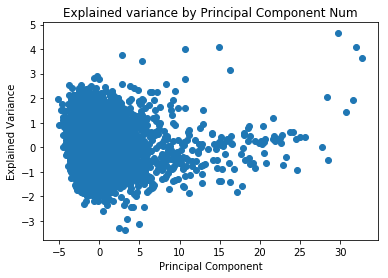

In [80]:
# Plot the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).
plt.scatter(pca_df.loc[:, 'pc1'], pca_df.loc[:, 'pc4'])
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

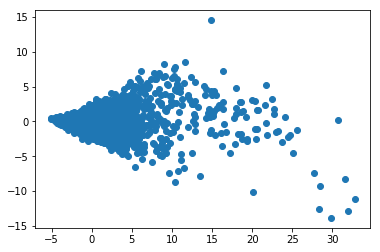

In [81]:
plt.scatter(pca_df.loc[:, 'pc1'], pca_df.loc[:, 'pc2'])
#it seems these two featurs are dependent 

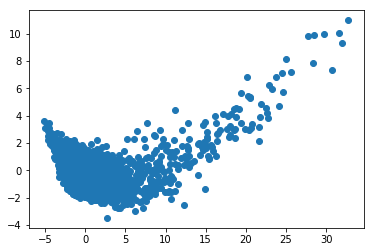

In [82]:
plt.scatter(pca_df.loc[:, 'pc1'], pca_df.loc[:, 'pc3'])
#two two features are somewhat correlated 

In [66]:
print(pca.explained_variance_)
print(pca.components_)

[1.12629682e+01 1.67318476e+00 1.24072101e+00 7.64997339e-01
 3.09303033e-01 2.22920126e-01 1.72792228e-01 1.61771857e-01
 1.03092483e-01 4.35311730e-02 2.02908815e-02 1.40172168e-02
 8.66818249e-03 4.46498205e-03 3.77897603e-07 2.08498997e-08]
[[ 2.66680761e-01  2.49630961e-01  2.58814463e-01  2.64846957e-01
   2.58815853e-01  2.78514626e-01  2.78807570e-01  2.69096387e-01
   2.74501569e-01  2.61648539e-01  2.69095967e-01  2.58389879e-01
  -2.56668739e-01  1.67337269e-01  7.04006974e-02  2.30018365e-01]
 [-2.94844179e-01 -3.04666661e-01 -3.08566095e-01 -2.28675347e-01
  -3.08567056e-01  2.60693870e-01  2.49778241e-01  2.87033112e-01
   2.72473999e-01  2.62470131e-01  2.87034304e-01 -8.65097640e-03
  -5.30603460e-02 -3.59628846e-02 -2.97479980e-01 -2.15843319e-01]
 [ 1.82339680e-01 -7.96501958e-02  2.18903790e-01  2.40635185e-01
   2.18897596e-01  1.26286346e-03  1.22880779e-03 -1.13779298e-02
   9.75621820e-03 -9.13225624e-02 -1.13771751e-02  2.76742666e-01
   2.67412818e-01 -4.216360

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     95.87
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           2.21e-97
Time:                        15:03:30   Log-Likelihood:                -8105.6
No. Observations:                5875   AIC:                         1.622e+04
Df Residuals:                    5869   BIC:                         1.626e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.679e-16      0.013  -5.32e-14      1.0

C:\Users\T\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Histogram')

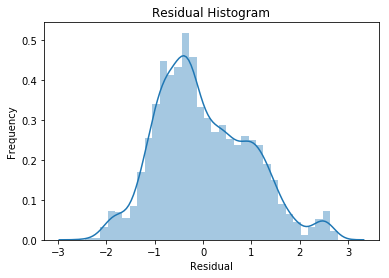

In [79]:
# Perform linear regression with the first N columns.
n = 5
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

Summary of your results!

In [ ]:
#R squared of 7.6% suggest that it taking into consideration only 7.6% of the values. when using  first 5 features

In [84]:
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,total_UPDRS
0,-0.978108,-0.057540,1.760088,-0.049483,-0.476558,0.376887,-0.561067,0.635614,0.339977,0.039112,-0.027261,-0.024319,0.001029,0.031725,0.000752,7.079963e-06,0.502745
1,-2.601857,0.553154,1.487455,0.058596,0.066572,0.170468,0.215560,-0.165989,0.122985,-0.018919,-0.003925,0.052872,-0.011968,0.024268,-0.000761,-7.357055e-06,0.549103
2,-1.939773,-0.115513,1.205962,-0.687477,-0.856751,-0.136187,-0.139529,0.228277,0.088253,0.041748,-0.079120,-0.015546,-0.059301,-0.002890,0.000743,3.684664e-06,0.595367
3,-1.022993,-0.103017,0.533406,-0.508542,-1.541859,-0.189726,0.583599,-0.088389,-0.618057,0.102112,-0.265533,-0.024285,0.001197,-0.182390,-0.000022,1.802279e-04,0.634716
4,-2.475704,0.230181,0.960314,-0.476941,-0.604783,-0.080478,0.417343,-0.175978,0.016228,0.004227,-0.036416,0.009636,-0.068263,0.004084,-0.000762,1.719776e-04,0.687522
5,-1.715690,0.454255,0.399084,-0.841991,-0.337941,-0.091877,0.153561,0.159555,0.139693,-0.065314,-0.011652,-0.008709,-0.044457,0.002301,-0.000003,-1.809305e-04,0.733787
6,-0.147085,1.787093,0.984376,-0.158777,-0.346558,0.462376,0.170490,0.301066,0.127775,-0.035674,-0.159246,-0.032209,0.023104,-0.105349,0.000754,7.199976e-06,0.779864
7,-1.382134,0.101887,1.135575,-0.723950,-0.973477,-0.192540,0.051899,0.207094,-0.044245,-0.017276,0.066061,-0.122971,0.022587,0.003542,0.000016,2.216396e-07,0.826035
8,-0.442563,1.073226,0.075972,0.032952,-0.236933,-0.005101,0.228021,0.096542,0.190847,-0.018541,-0.231207,0.015275,-0.023545,0.160874,-0.000039,-1.849163e-04,0.872393
9,-0.474264,0.786236,0.701944,-0.114788,-0.311244,0.322617,0.004988,0.280278,-0.145978,0.016787,0.053841,0.074679,-0.002208,0.035338,-0.000759,1.722538e-04,0.918751


In [151]:
# Perform linear regression with all columns.

pcr_model = sm.ols(formula= 'y_scaled ~ x_scaled', data=pca_df )

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               y_scaled   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     40.94
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          5.85e-122
Time:                        16:32:35   Log-Likelihood:                -8024.9
No. Observations:                5875   AIC:                         1.608e+04
Df Residuals:                    5858   BIC:                         1.620e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.679e-16      0.012  -5.39e-14   

### comparing coefficient and p>t to select the right features

In [150]:
# Perform linear regression with independent features the first N columns.

pcr_model = sm.ols(formula= 'y_scaled ~ pc4 + pc9+ pc8 + pc5 + pc1', data=pca_df )

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               y_scaled   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          2.92e-125
Time:                        16:30:48   Log-Likelihood:                -8041.0
No. Observations:                5875   AIC:                         1.609e+04
Df Residuals:                    5869   BIC:                         1.613e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.679e-16      0.012  -5.38e-14      1.0

In [152]:
# with only 5 features the model was able to achieve the same R square as the model with all the features
